In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/train.csv", index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


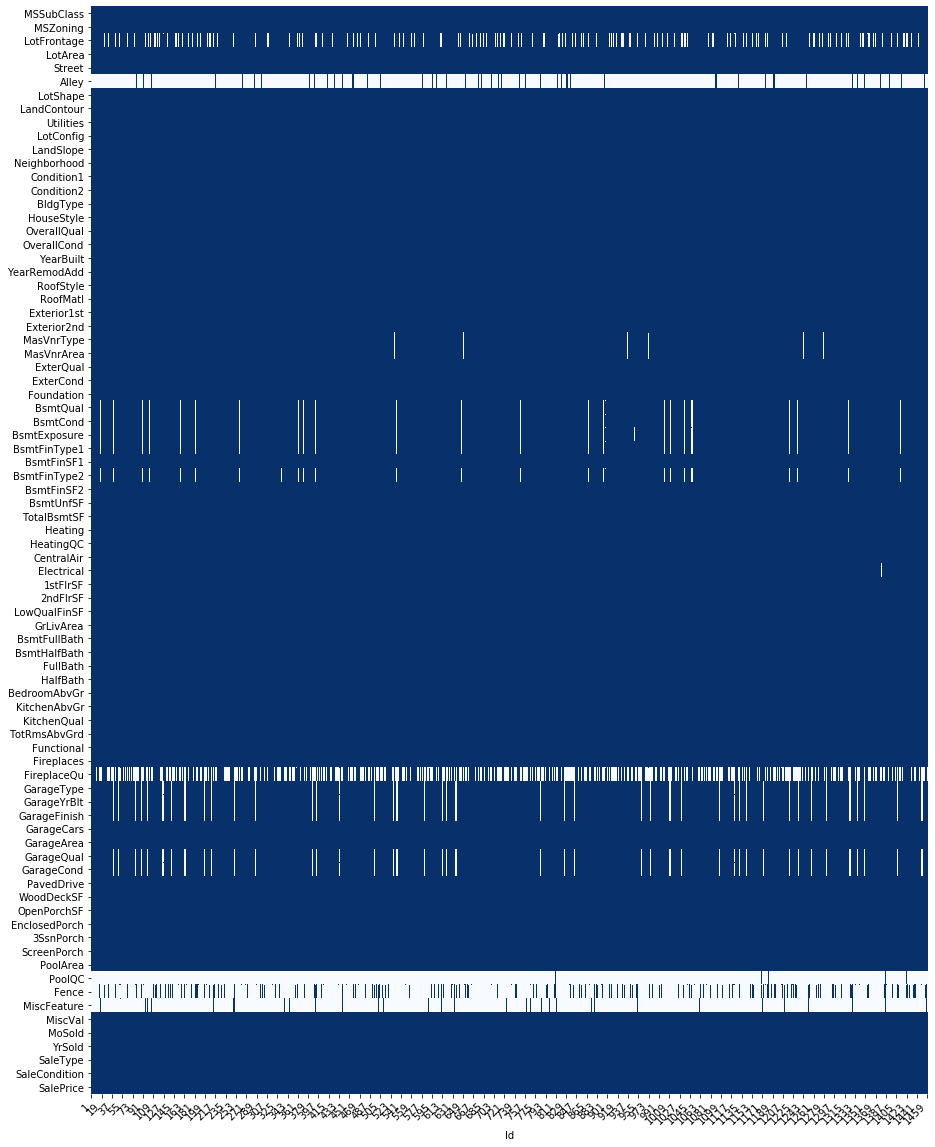

In [12]:
plot_missing_value(df, figsize=(15, 20))

In [13]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
much_miss_col = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
pd.DataFrame(df[much_miss_col].isnull().sum().to_list(), index=much_miss_col)

,0
Alley,1369
FireplaceQu,690
PoolQC,1453
Fence,1179
MiscFeature,1406


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [5]:
df.drop(columns=much_miss_col, inplace=True)

In [6]:
X = df.drop(columns="SalePrice")
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 74), (292, 74), (1168,), (292,))

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\Miniconda3\envs\jcopmlbdg\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
cat_col = []
num_col = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal

In [9]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), num_col),
    ('categoric', cat_pipe(encoder='onehot'), cat_col),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished


{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.9853502099107344 0.8833753943140609 0.9038777151389289


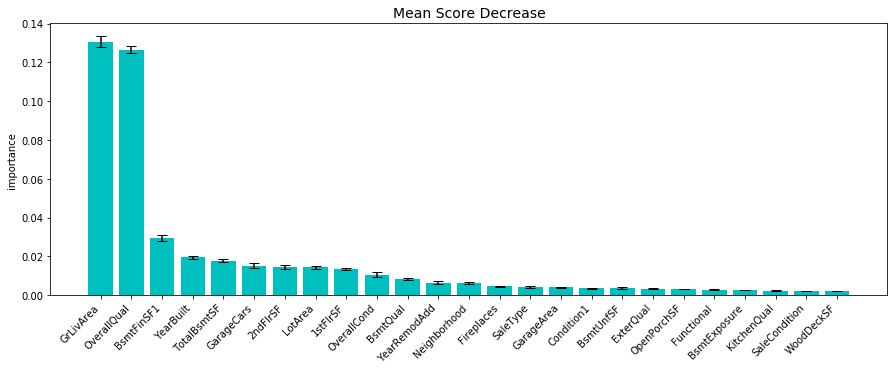

In [10]:
pepe = mean_score_decrease(X_train, y_train, model, plot=True, topk=25)

In [11]:
pepedf = pd.DataFrame(pepe)
pepedf.head()

,feature,importance,stdev
44,GrLivArea,0.130572,0.002808
15,OverallQual,0.126494,0.001825
32,BsmtFinSF1,0.029356,0.001499
17,YearBuilt,0.019507,0.000574
36,TotalBsmtSF,0.017805,0.000658


In [12]:
pepedf.feature.iloc[1]

'OverallQual'

In [13]:
most_25_col = []
for i in range(len(pepedf)):
    most_25_col.append(pepedf.feature.iloc[i])
print(most_25_col)

['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'LotArea', '1stFlrSF', 'OverallCond', 'BsmtQual', 'YearRemodAdd', 'Neighborhood', 'Fireplaces', 'SaleType', 'GarageArea', 'Condition1', 'BsmtUnfSF', 'ExterQual', 'OpenPorchSF', 'Functional', 'BsmtExposure', 'KitchenQual', 'SaleCondition', 'WoodDeckSF']


In [14]:
cat_col = []
num_col = []
for i in range(len(pepedf)):
    if X_train[pepedf.feature.iloc[i]].dtype == 'object':
        cat_col.append(pepedf.feature.iloc[i])
    else:
        num_col.append(pepedf.feature.iloc[i])
print(cat_col)
print(num_col)

['BsmtQual', 'Neighborhood', 'SaleType', 'Condition1', 'ExterQual', 'Functional', 'BsmtExposure', 'KitchenQual', 'SaleCondition']
['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'LotArea', '1stFlrSF', 'OverallCond', 'YearRemodAdd', 'Fireplaces', 'GarageArea', 'BsmtUnfSF', 'OpenPorchSF', 'WoodDeckSF']


In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), num_col),
    ('categoric', cat_pipe(encoder='onehot'), cat_col),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   53.1s finished


{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.9826387268799157 0.9003546962328962 0.9126214195197871


In [64]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [65]:
most_10_col = []
for i in range(10):
    most_10_col.append(pepedf.feature.iloc[i])
print(most_10_col)

['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'LotArea', '1stFlrSF', 'OverallCond']


In [66]:
cat_col = []
num_col = []
for i in range(10):
    if X_train[pepedf.feature.iloc[i]].dtype == 'object':
        cat_col.append(pepedf.feature.iloc[i])
    else:
        num_col.append(pepedf.feature.iloc[i])
print(cat_col)
print(num_col)

[]
['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'LotArea', '1stFlrSF', 'OverallCond']


In [67]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), num_col),
    #('categoric', cat_pipe(encoder='onehot'), cat_col),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.2min finished


{'algo__colsample_bytree': 0.7048235217656795, 'algo__gamma': 3, 'algo__learning_rate': 0.08534852819566893, 'algo__max_depth': 6, 'algo__n_estimators': 157, 'algo__reg_alpha': 2.7645119606152053, 'algo__reg_lambda': 0.010023177978572915, 'algo__subsample': 0.3194173672147116}
0.9844623536838225 0.8844865950296139 0.9120882478110742


## Lets Try some EDA

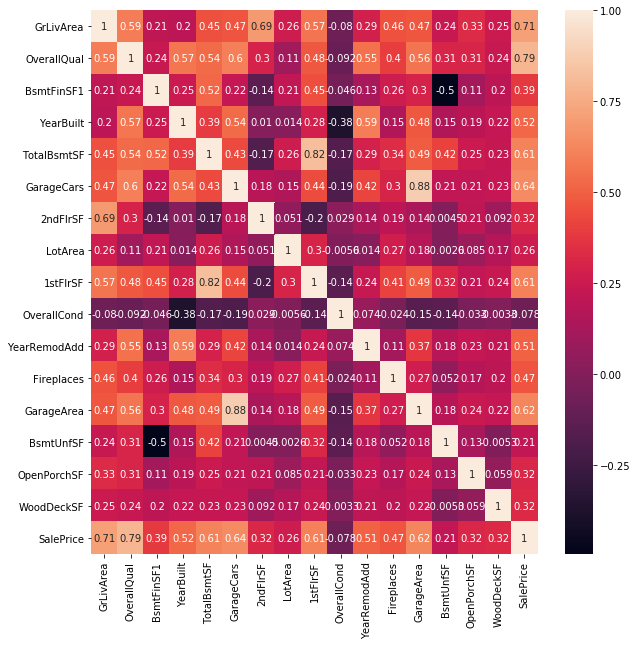

In [62]:
plt.figure(figsize=(10, 10))
corr = df[most_25_col + ['SalePrice']].corr()
_ = sns.heatmap(corr, annot=True)

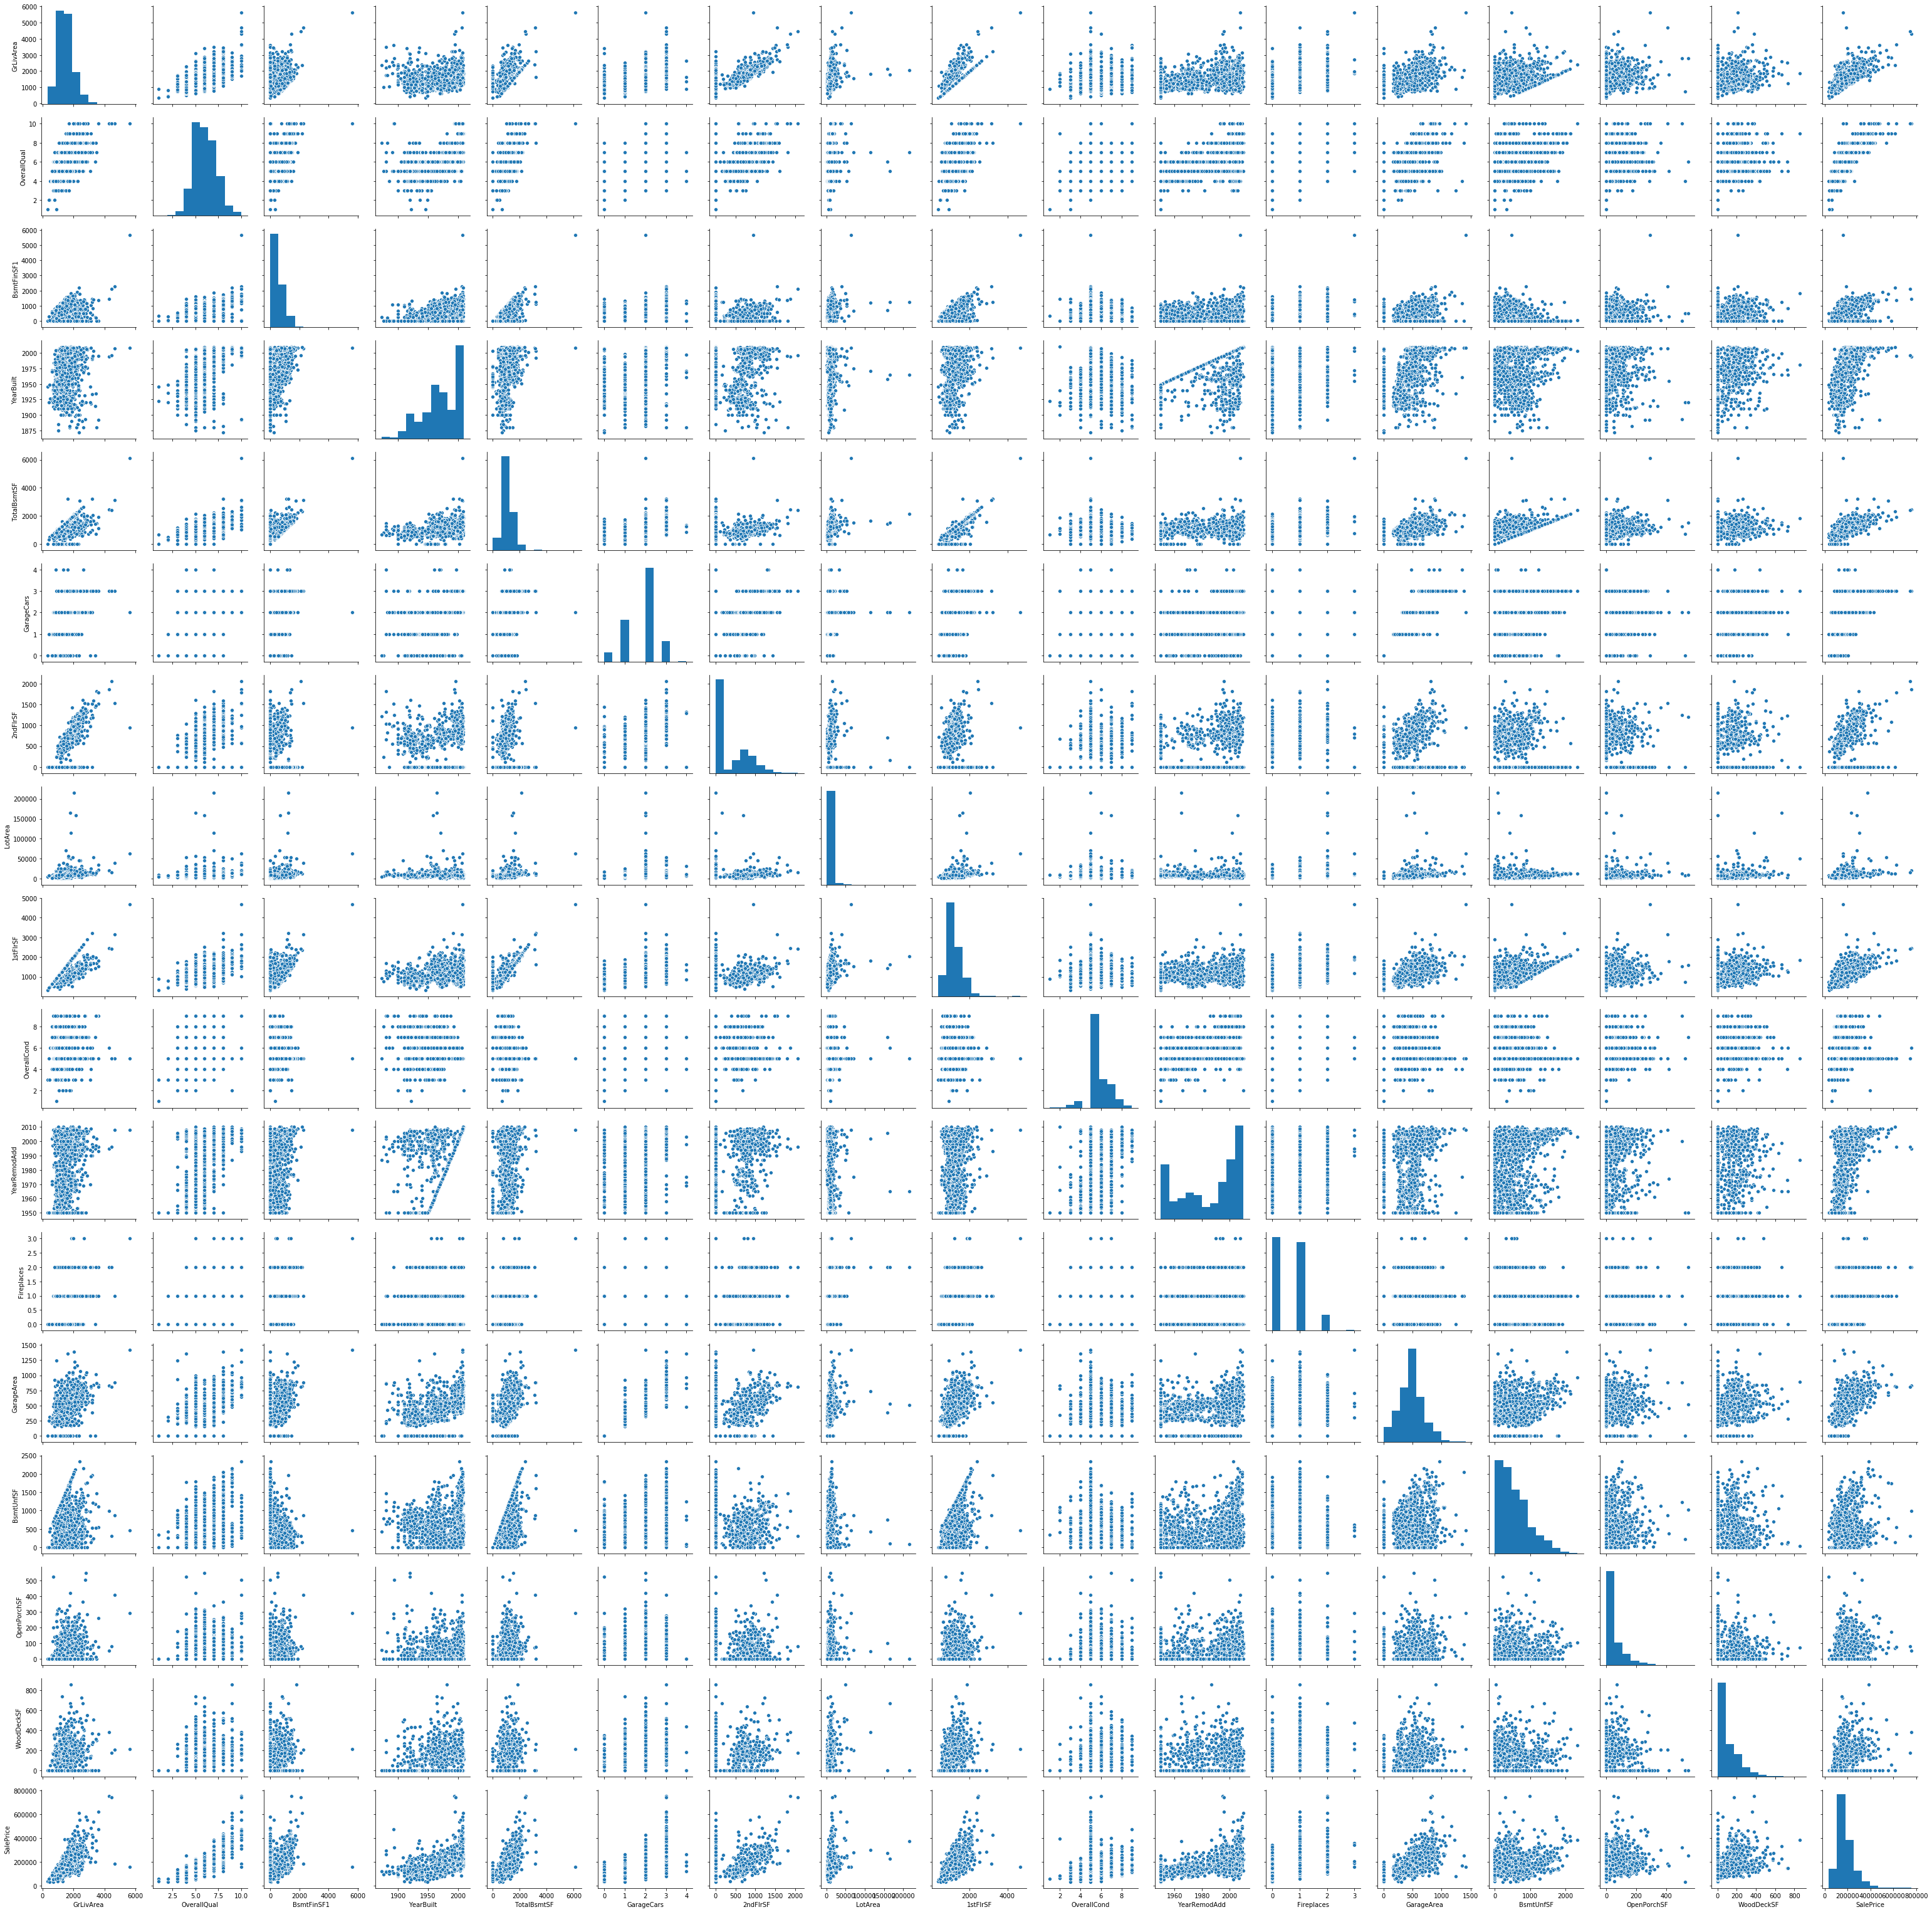

In [63]:
sns.pairplot(df[most_25_col + ['SalePrice']])

# Submission

In [33]:
from sklearn.metrics import mean_absolute_error

In [58]:
preds = model.predict(X_test)
mean_absolute_error(y_test, preds)

16072.862451840754

In [35]:
datatest = pd.read_csv('data/test.csv', index_col='Id')

In [42]:
dropped_datatest = datatest.drop(columns=much_miss_col)

In [59]:
preds_test = model.predict(dropped_datatest)

# Save test predictions to file
output = pd.DataFrame({'Id': datatest.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)